# Download and load stocks data

## Download data

In [1]:
import yfinance as yf
from datetime import date
today = date.today()

In [2]:
import yfinance as yf

#define the ticker symbol
tickerSymbol = 'TCS'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
data2 = tickerData.history(period='1d', start='2004-1-1', end=today)
data = yf.download("TCS", start="2001-01-01", end=today)
#see your data
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-11-01,35.000000,37.000000,32.099998,36.200001,33.839130,14667600
2013-11-04,36.799999,36.799999,34.689999,35.349998,33.044563,1586600
2013-11-05,35.110001,35.500000,34.820000,35.349998,33.044563,337700
2013-11-06,35.610001,36.490002,35.610001,35.900002,33.558697,549600
2013-11-07,36.799999,36.799999,34.119999,35.310001,33.007175,883700
...,...,...,...,...,...,...
2021-09-23,10.690000,11.090000,10.660000,10.860000,10.860000,324400
2021-09-24,10.740000,11.020000,10.600000,10.990000,10.990000,435400
2021-09-27,11.040000,11.320000,11.040000,11.210000,11.210000,455900


In [3]:
data = data.rename_axis('Date').reset_index()
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-01,35.000000,37.000000,32.099998,36.200001,33.839130,14667600
1,2013-11-04,36.799999,36.799999,34.689999,35.349998,33.044563,1586600
2,2013-11-05,35.110001,35.500000,34.820000,35.349998,33.044563,337700
3,2013-11-06,35.610001,36.490002,35.610001,35.900002,33.558697,549600
4,2013-11-07,36.799999,36.799999,34.119999,35.310001,33.007175,883700
...,...,...,...,...,...,...,...
1986,2021-09-23,10.690000,11.090000,10.660000,10.860000,10.860000,324400
1987,2021-09-24,10.740000,11.020000,10.600000,10.990000,10.990000,435400
1988,2021-09-27,11.040000,11.320000,11.040000,11.210000,11.210000,455900
1989,2021-09-28,11.140000,11.300000,10.920000,10.940000,10.940000,330400


## Import libraries

In [4]:
import pandas as pd
import numpy as np

In [5]:
data.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-01,35.000000,37.000000,32.099998,36.200001,33.839130,14667600
1,2013-11-04,36.799999,36.799999,34.689999,35.349998,33.044563,1586600


In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-01,35.000000,37.000000,32.099998,36.200001,33.839130,14667600
1,2013-11-04,36.799999,36.799999,34.689999,35.349998,33.044563,1586600
2,2013-11-05,35.110001,35.500000,34.820000,35.349998,33.044563,337700
3,2013-11-06,35.610001,36.490002,35.610001,35.900002,33.558697,549600
4,2013-11-07,36.799999,36.799999,34.119999,35.310001,33.007175,883700
...,...,...,...,...,...,...,...
1986,2021-09-23,10.690000,11.090000,10.660000,10.860000,10.860000,324400
1987,2021-09-24,10.740000,11.020000,10.600000,10.990000,10.990000,435400
1988,2021-09-27,11.040000,11.320000,11.040000,11.210000,11.210000,455900
1989,2021-09-28,11.140000,11.300000,10.920000,10.940000,10.940000,330400


In [7]:
data = data.dropna()

## Plot data

In [8]:
import matplotlib.pyplot as plt

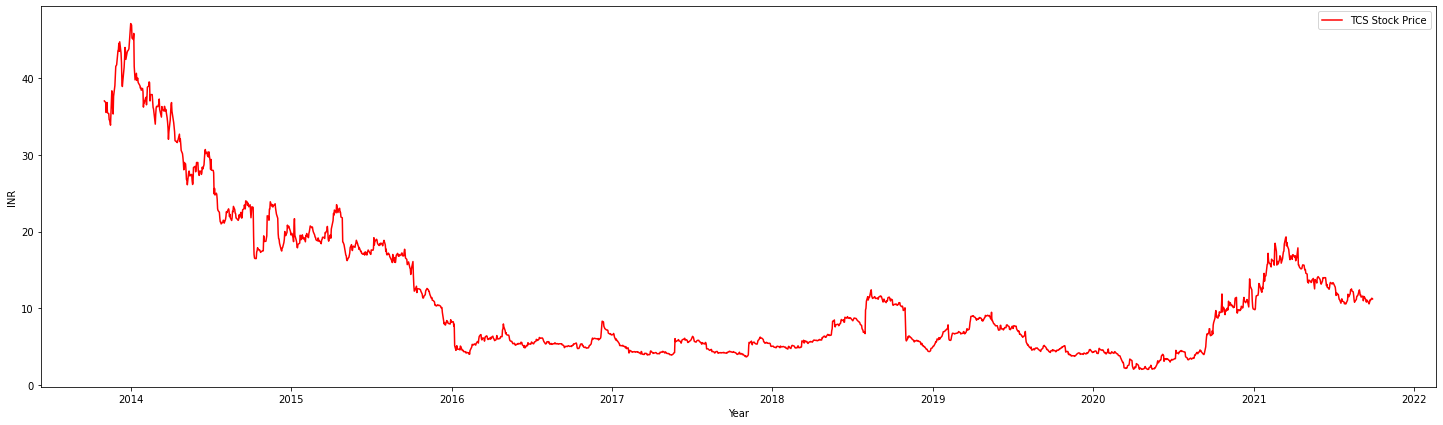

In [9]:
fig = plt.figure(figsize = (25, 7))
plt.plot(data.Date,data.High, color = 'red', label = 'TCS Stock Price')
plt.xlabel('Year')
plt.ylabel('INR')
plt.legend()
plt.show()

# Splitting data into training and testing

In [10]:
data.shape
#rows*colums

(1991, 7)

In [11]:
data.shape[0]*0.8

3764.8

In [20]:
# 80% will be used for traning, and 20% for testing

train_size = 0.8        # 80%
split_index = int(train_size * data.shape[0])

factors_column = ['Open', 'High', 'Low', 'Close', 'Volume']
y_col_index = 5 # Adj Close

train_set = data[factors_column].values[:split_index]
test_set = data[factors_column].values[split_index:]

In [14]:
split_index

1592

# Scaling data between 0-1
for better learning

In [15]:
from sklearn.preprocessing import MinMaxScaler

# scale our price from 0 to 1

sc = MinMaxScaler(feature_range = (0, 1))
train_set_scaled = sc.fit_transform(train_set)
test_set_scaled = sc.fit_transform(test_set)

In [16]:
train_set_scaled[0]

array([0.72599263, 0.76786538, 0.67910624, 0.75818816, 1.        ])

# Generate windowed timestamp data

In [18]:
# this function will combine data of 60 days (we can change it using time_window parameter) 

def generate_data(series, y_col_index, time_window=60):
    X = []
    y = []
    for i in range(60, len(series)):
        X.append(series[i-time_window: i])
        y.append(series[i, y_col_index])
    return (np.array(X), np.array(y))

In [21]:
X_train, y_train = generate_data(train_set_scaled, y_col_index=y_col_index)
X_test, y_test = generate_data(test_set_scaled, y_col_index=y_col_index)

In [22]:
print('Training data shape: ',X_train.shape)
print('We will observe {} days price to predict next day price'.format(X_train.shape[1]))

Training data shape:  (1532, 60, 5)
We will observe 60 days price to predict next day price


# Create Multi Layer LSTM Network

In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [29]:
model = Sequential()

# layer 1
#return_sequence=True, it will return something with shape
#unit means the dimension of the inner cells in LSTM.

model.add(LSTM(units = 50, return_sequences = True, input_shape = X_train.shape[1:]))
model.add(Dropout(0.2))

# layer 2
model.add(LSTM(units = 30, return_sequences = True))
model.add(Dropout(0.2))

# layer 3
model.add(LSTM(units = 10, return_sequences = True))
model.add(Dropout(0.2))

# layer 4
model.add(LSTM(units = 5))
model.add(Dropout(0.2))

# layer 5
model.add(Dense(units = 1))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            11200     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 30)            9720      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 30)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 10)            1640      
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 10)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 5)                 3

## Compile and train LSTM Network

In [36]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train,
          y_train,
          epochs = 100,
          batch_size = 64,
          validation_data = (X_test, y_test))

Epoch 1/100
24/24 [==============================] - 9s 146ms/step - loss: 0.0022 - val_loss: 0.0102
Epoch 2/100
24/24 [==============================] - 3s 112ms/step - loss: 0.0028 - val_loss: 0.0047
Epoch 3/100
24/24 [==============================] - 3s 139ms/step - loss: 0.0025 - val_loss: 0.0065
Epoch 4/100
24/24 [==============================] - 3s 112ms/step - loss: 0.0025 - val_loss: 0.0053
Epoch 5/100
24/24 [==============================] - 3s 109ms/step - loss: 0.0026 - val_loss: 0.0088
Epoch 6/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0026 - val_loss: 0.0050
Epoch 7/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0022 - val_loss: 0.0070
Epoch 8/100
24/24 [==============================] - 3s 118ms/step - loss: 0.0029 - val_loss: 0.0061
Epoch 9/100
24/24 [==============================] - 3s 120ms/step - loss: 0.0026 - val_loss: 0.0045
Epoch 10/100
24/24 [==============================] - 3s 127ms/step - loss: 0.0023 - val_lo

# Test trained LSTM Network

In [37]:
test_prediction = model.predict(X_test)
test_prediction = (test_prediction * sc.data_range_[y_col_index]) + sc.data_min_[y_col_index]

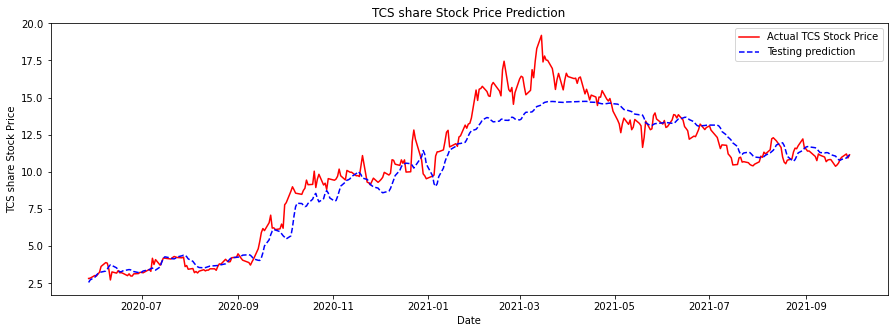

In [38]:
fig = plt.figure(figsize = (15, 5))
plt.plot(data.Date.values[ split_index+60 : ], data.Close.values[ split_index+60: ], 'r-', label = 'Actual TCS Stock Price')
plt.plot(data['Date'].values[split_index+60 : ], test_prediction, 'b--', label = 'Testing prediction')

plt.title('TCS share Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('TCS share Stock Price')
plt.legend()
plt.show()

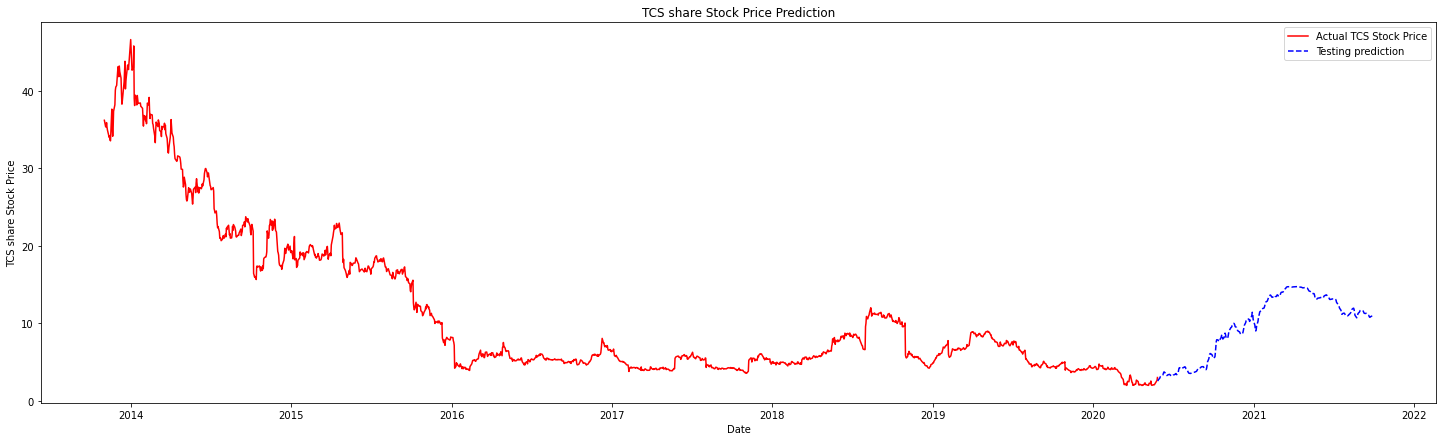

In [39]:
fig = plt.figure(figsize = (25, 7))
plt.plot(data.Date.values[ : split_index+60 ], data.Close.values[ : split_index+60 ], 'r-', label = 'Actual TCS Stock Price')
plt.plot(data['Date'].values[split_index+60 : ], test_prediction, 'b--', label = 'Testing prediction')

plt.title('TCS share Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('TCS share Stock Price')
plt.legend()
plt.show()

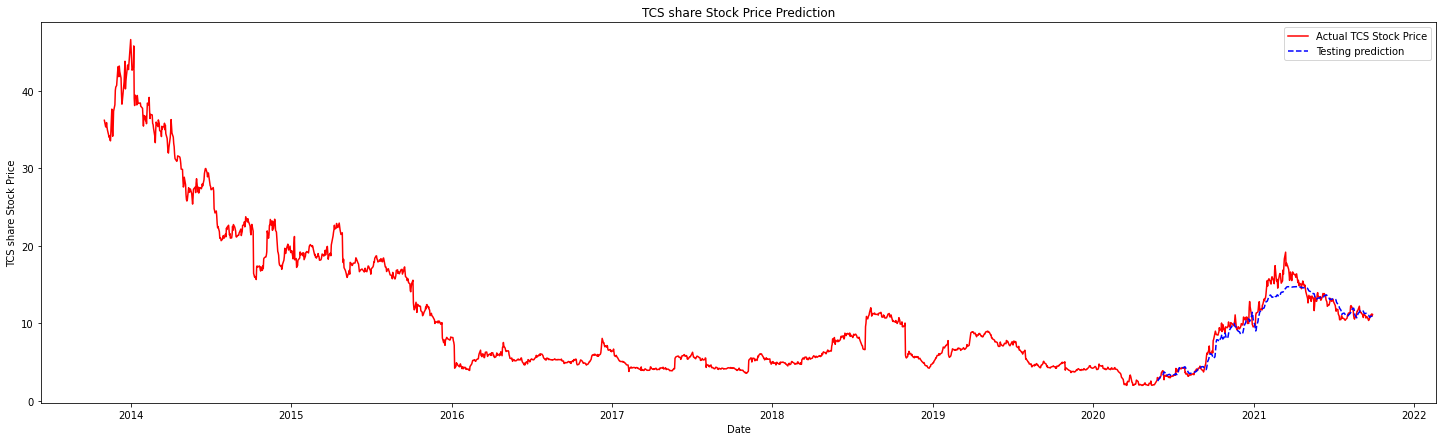

In [40]:
fig = plt.figure(figsize = (25, 7))
plt.plot(data.Date, data.Close, 'r-', label = 'Actual TCS Stock Price')
plt.plot(data['Date'].values[split_index+60 : ], test_prediction, 'b--', label = 'Testing prediction')

plt.title('TCS share Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('TCS share Stock Price')
plt.legend()
plt.show()